## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import logging

from PySONIC.utils import logger, si_format
from PySONIC.neurons import getPointNeuron
from MorphoSONIC.core import PlanarDiskTransducerSource, SonicFiber, myelinatedFiberReilly, strengthDuration
from MorphoSONIC.plt import SectionCompTimeSeries, strengthDurationCurve, strengthDistanceCurve

## Transducer 1

In [2]:
u_z = 1                          # transducer surface velocity (m/s)
r_tr = (19e-3) / 2             # transducer radius (m)
x0 = 0                           # transducer location x-axis (m)
y0 = 0                           # transducer location y-axis (m)
z0 = 0                           # transducer location z-axis (m)
Fdrive = 0.5e6   # US frequency
psource = PlanarDiskTransducerSource((x0, y0, z0), Fdrive, u_z, r=r_tr) #310

AttributeError: 'numpy.ndarray' object has no attribute 'set_xlabel'

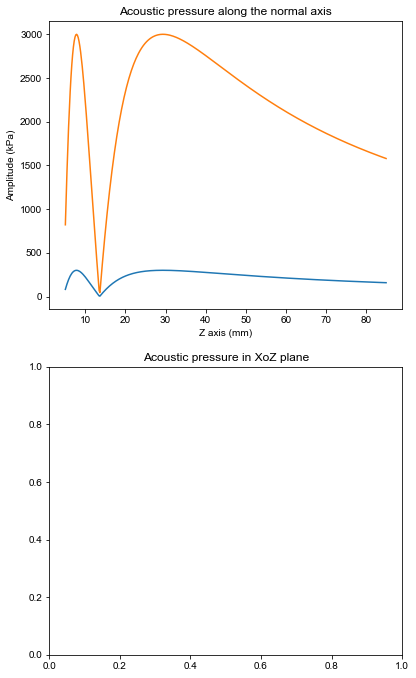

In [3]:
def plotAmp(x, z, amps, refamps):
    # Plot amplitude distribution along normal axis and over 2D field
    fig, axes = plt.subplots(2, 1, figsize=(7, 11))
    fig.subplots_adjust(left=0.1, bottom=0.1, top=0.9, right=0.80)
    ax = axes[0]
    ax.set_title('Acoustic pressure along the normal axis')
    ax.set_xlabel('Z axis (mm)')
    ax.set_ylabel('Amplitude (kPa)')
    ax.plot(z * 1e3, amps[int(x.size / 2), :] * 1e-3)
    ax.plot(z * 1e3, refamps * 1e-3)
    ax = axes[1]
    ax.set_title('Acoustic pressure in XoZ plane')
    axes.set_xlabel('Z axis (mm)')
    axes.set_ylabel('X axis (mm)')
    sm = ax.pcolormesh(z * 1e3, x * 1e3, amps * 1e-3, cmap='jet')  #viridis
    cbarax = fig.add_axes([0.85, 0.10, 0.05, 0.80])
    fig.colorbar(sm, cax=cbarax)
    cbarax.set_ylabel('Amplitude (kPa)')         
    return fig

# Generate 2D square grid
n = 400
x = np.linspace(-0.03, 0.03, n)  # m
z = np.linspace(0.005, 0.085, n)   # m without the first 100 nm

# Plot acoustic amplitudes over 2D grid for each frequency
r_tr = 9.5e-3
A = 300e3
source = PlanarDiskTransducerSource((0, 0, 'focus'), Fdrive, u=1, r=r_tr)
fiber = myelinatedFiberReilly(SonicFiber, 10e-6)
u = source.computeSourceAmp(fiber, A)
source = PlanarDiskTransducerSource((0, 0, 0), Fdrive, u=u, r=r_tr)
amps = source.DPSM2d(x, z)  # Pa
refamps = psource.normalAxisAmp(z)
fig = plotAmp(x, z, amps, refamps)
#fig.suptitle(f'trasducerR={r_tr*1e3}mm, Fdrive={si_format(Fdrive)}Hz, focus={(source.getFocalDistance() * 1e3):.2f}mm', fontsize=12)

<IPython.core.display.Javascript object>


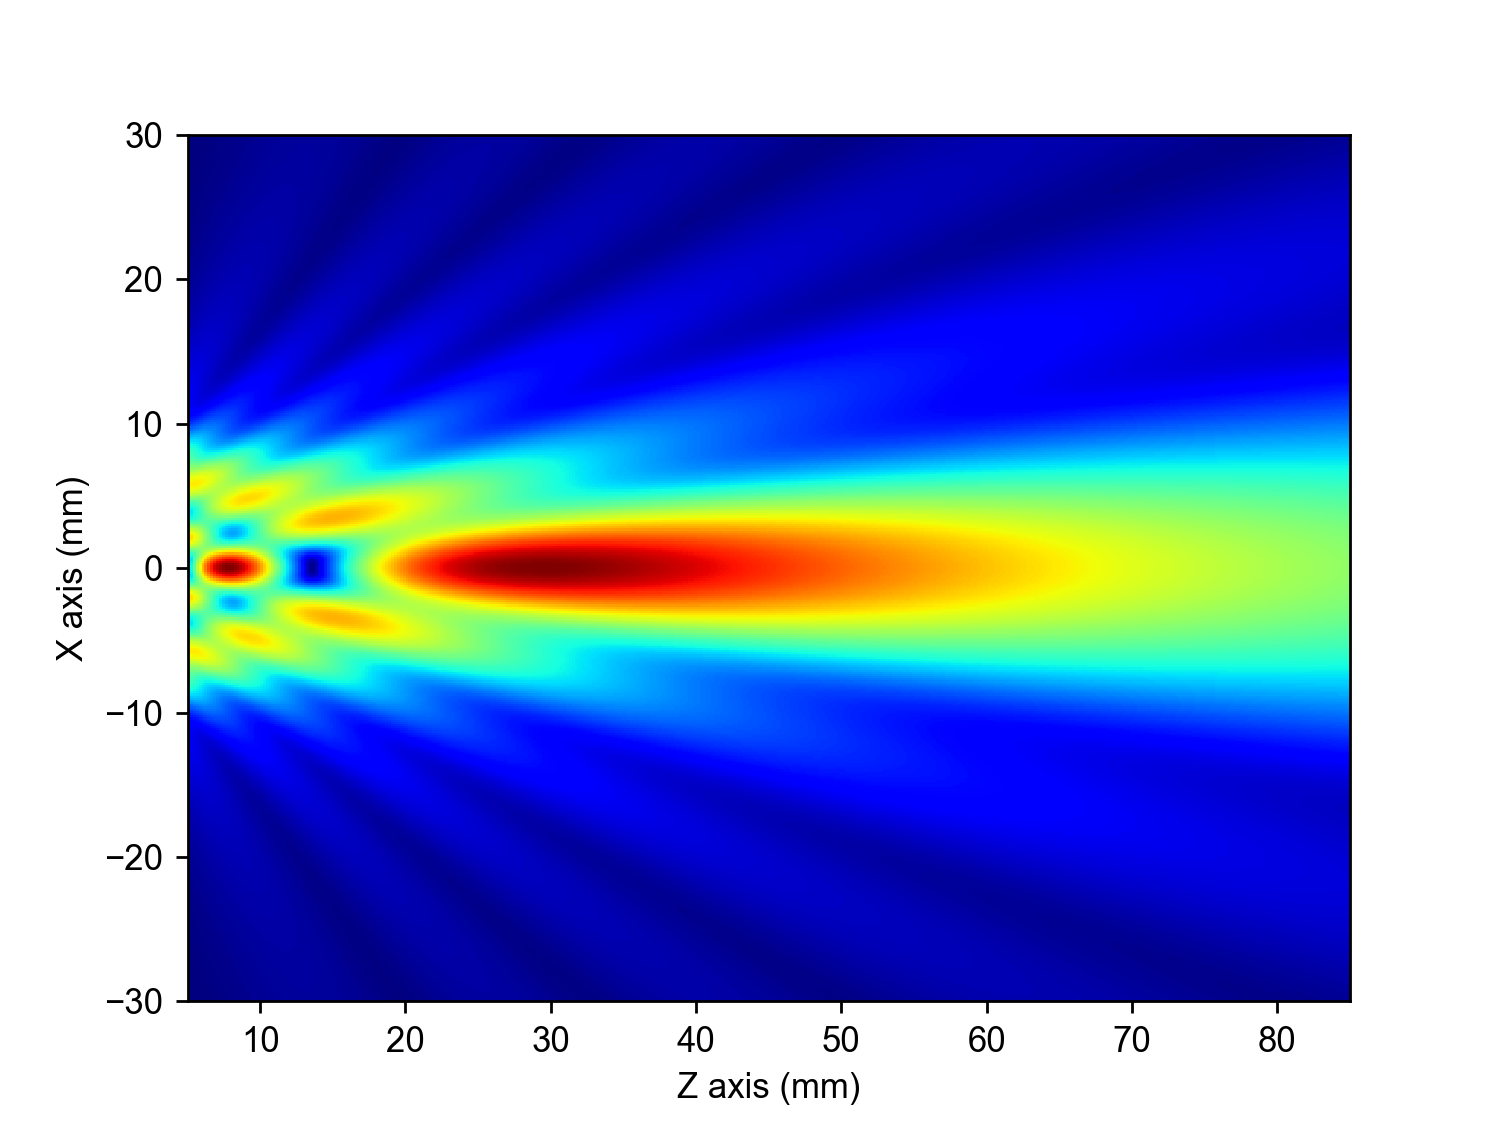

In [26]:
def plotAmp(x, z, amps):
    # Plot amplitude distribution along normal axis and over 2D field
    fig, axes = plt.subplots(figsize=(6, 4.5))
    #axes.set_title('Acoustic pressure in XoZ plane')
    axes.set_xlabel('Z axis (mm)')
    axes.set_ylabel('X axis (mm)')
    sm = axes.pcolormesh(z * 1e3, x * 1e3, amps * 1e-3, cmap='jet')  #viridis
    #cbarax = fig.add_axes([0.85, 0.10, 0.05, 0.80])
    #fig.colorbar(sm, cax=cbarax)
    #cbarax.set_ylabel('Amplitude (kPa)')         
    return fig

# Generate 2D square grid
n = 400
x = np.linspace(-0.03, 0.03, n)  # m
z = np.linspace(0.005, 0.085, n)   # m without the first 100 nm

r_tr = 9.5e-3
A = 300e3
source = PlanarDiskTransducerSource((0, 0, 'focus'), Fdrive, u=1, r=r_tr)
fiber = myelinatedFiberReilly(SonicFiber, 10e-6)
u = source.computeSourceAmp(fiber, A)
source = PlanarDiskTransducerSource((0, 0, 0), Fdrive, u=u, r=r_tr)
amps = source.DPSM2d(x, z)  # Pa
fig = plotAmp(x, z, amps)
#fig.suptitle(f'trasducerR={r_tr*1e3}mm, Fdrive={si_format(Fdrive)}Hz, focus={(psource.z * 1e3):.2f}mm', fontsize=12)

<IPython.core.display.Javascript object>


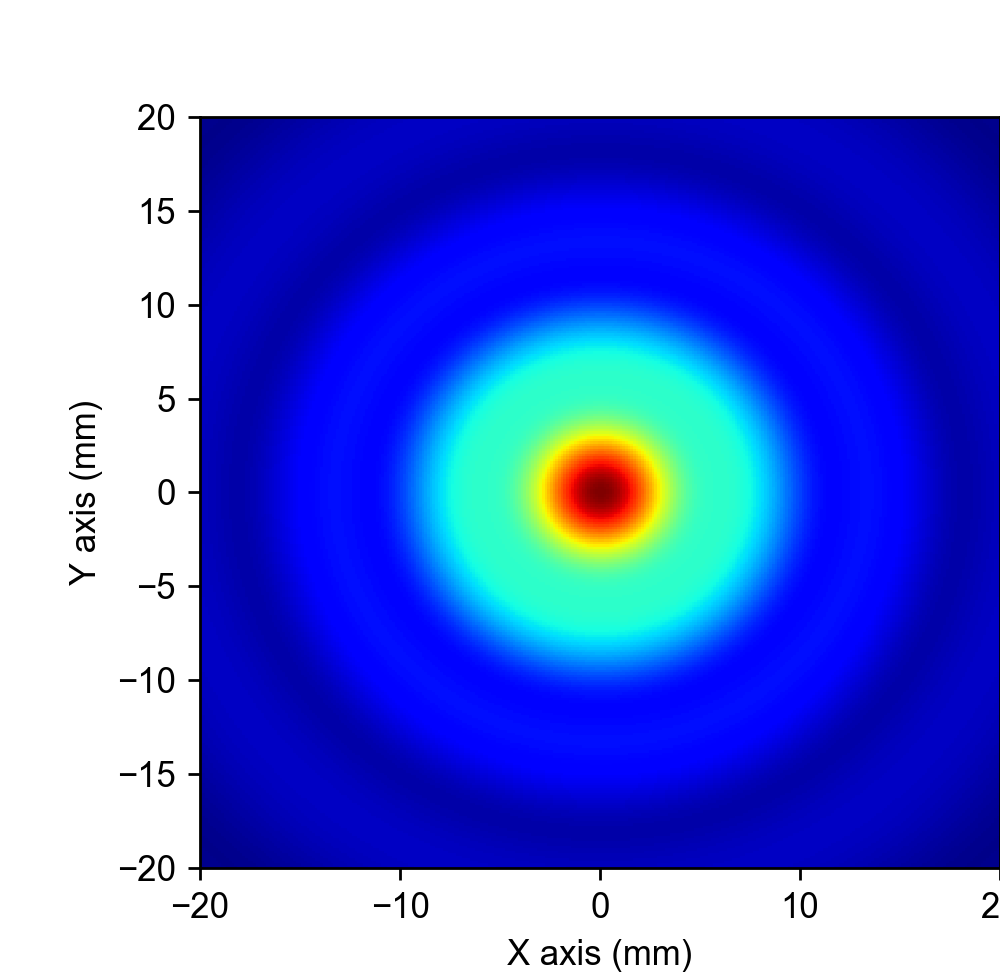

In [25]:
%matplotlib notebook
def plotAmp(x, z, amps):
    fig, axes = plt.subplots(figsize=(4, 3.9))
    fig.subplots_adjust(left=0.2, right=1)
    #axes.set_title('Acoustic amplitude distribution at the focal distance')
    axes.set_xlabel('X axis (mm)')
    axes.set_ylabel('Y axis (mm)')
    sm = axes.pcolormesh(y * 1e3, x * 1e3, amps * 1e-3, cmap='jet', vmin=0, vmax=300) #viridis
    #cbarax = fig.add_axes([0.85, 0.10, 0.05, 0.80])
    #fig.colorbar(sm, cax=cbarax)
    #cbarax.set_ylabel('Amplitude (kPa)')         
    return fig

n = 300
x = np.linspace(-0.02, 0.02, n)  # m
y = np.linspace(-0.02, 0.02, n)  # m

A = 300e3
r_tr = 9.5e-3
source = PlanarDiskTransducerSource((0, 0, 'focus'), Fdrive, u=1, r=r_tr)
fiber = myelinatedFiberReilly(SonicFiber, 10e-6)
u = source.computeSourceAmp(fiber, A)
source = PlanarDiskTransducerSource((0, 0, 'focus'), Fdrive, u=u, r=r_tr)
amps = source.DPSMxy (x, y, 0)  # Pa
fig = plotAmp(x, y, amps)
#fig.suptitle(f'trasducerR={r_tr*1e3}mm, Fdrive={si_format(Fdrive)}Hz, focus={(source.z * 1e3):.2f}mm', fontsize=12)

{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '32nm', 'Fdrive': '500kHz', 'fs': 'fs100%', 'fiberD': 'fiberD5.00um', 'zsource': 'zsource29.33mm', 'tstim_range': 'tstim10.0us-10.0ms'}
{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '32nm', 'Fdrive': '500kHz', 'fs': 'fs100%', 'fiberD': 'fiberD12.50um', 'zsource': 'zsource29.33mm', 'tstim_range': 'tstim10.0us-10.0ms'}
{'simkey': 'senn_SONIC', 'neuron': 'FH', 'a': '32nm', 'Fdrive': '500kHz', 'fs': 'fs100%', 'fiberD': 'fiberD20.00um', 'zsource': 'zsource29.33mm', 'tstim_range': 'tstim10.0us-10.0ms'}


<IPython.core.display.Javascript object>


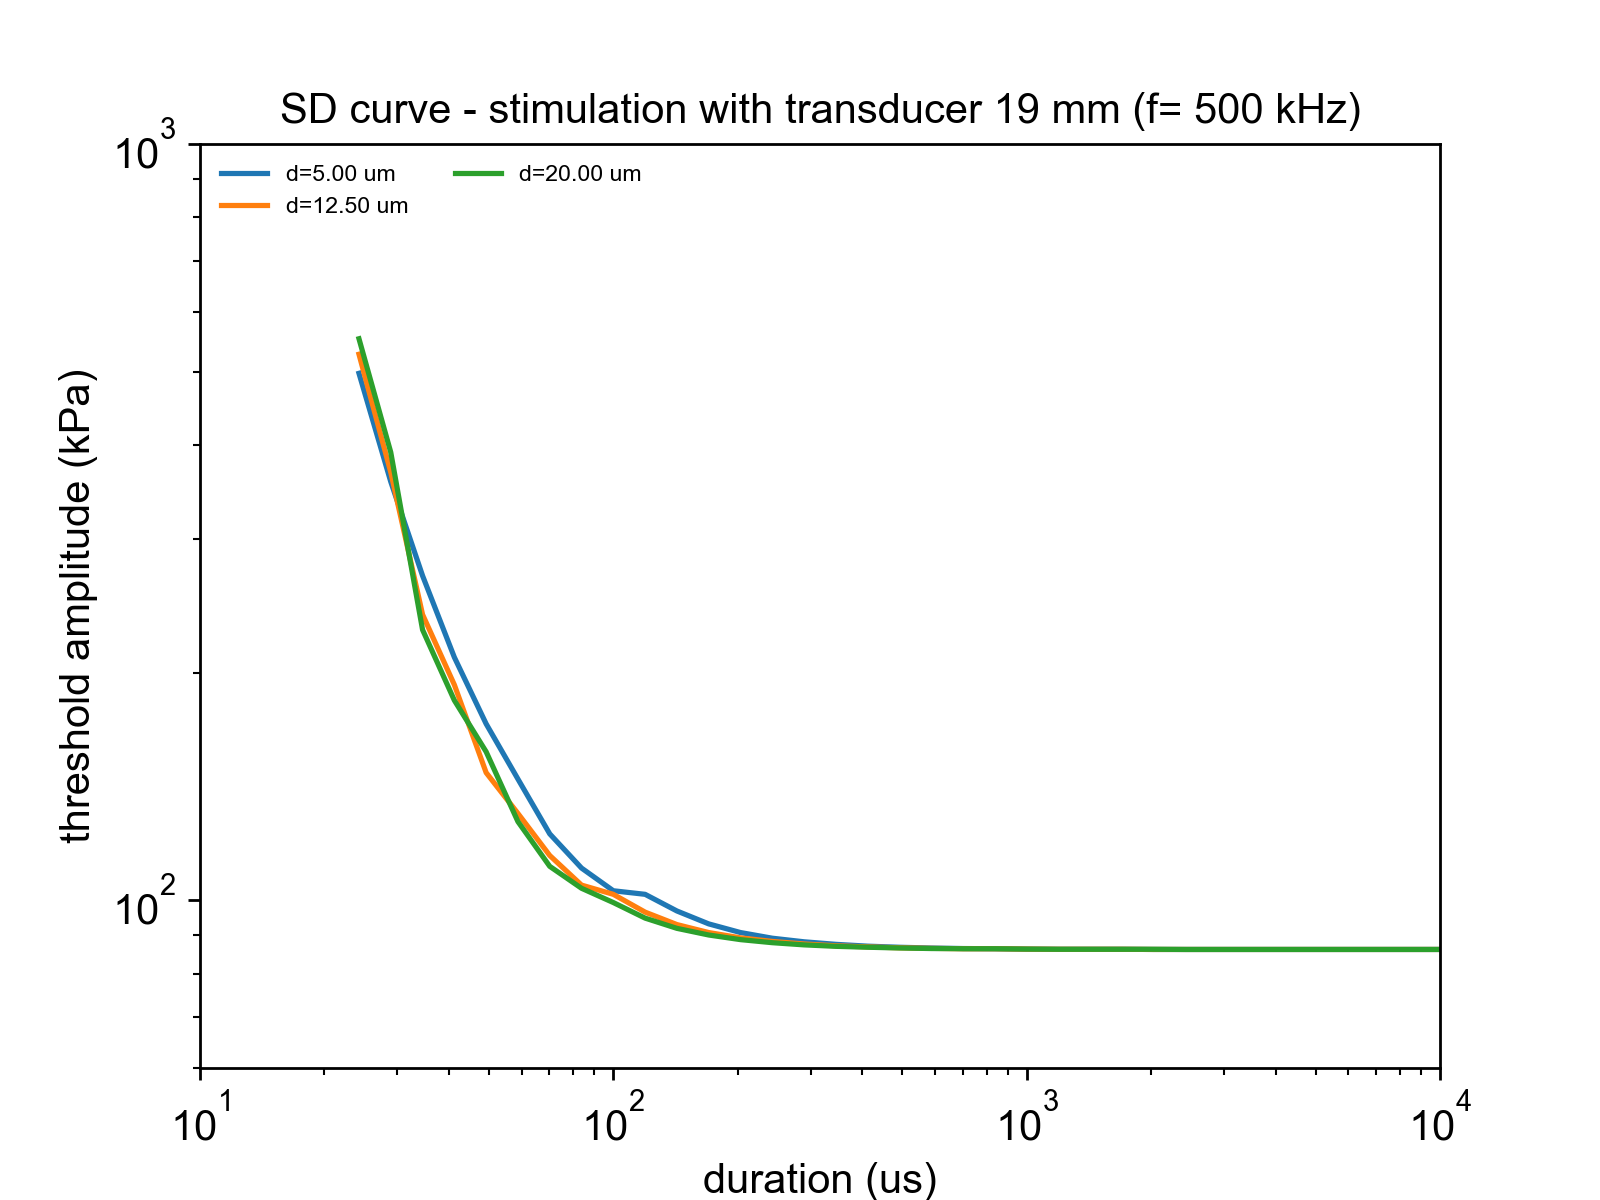

In [12]:
# Stimulation parameters
fiberClass = 'acoustic_planar_transducer' 
toffset = 20e-3  # s
n_dur = 40
tstim_range = np.logspace(-5, 0, n_dur)  # s
freq = 500e3      #(Hz)

outdir='strengthDurationData'
logger.setLevel(logging.WARNING)
Athr_myel = {}

fiberType = 'reilly'
diam_range = np.linspace(5e-6, 20e-6, 3)
for i, fiberD in enumerate(diam_range): 
    df = strengthDuration(fiberType, fiberClass, fiberD, tstim_range, toffset=toffset, outdir=outdir, Fdrive=freq, zdistance='focus', r=r_tr)
    Athr = np.absolute(df.values[:,1])      
    Athr_myel[f'd={(fiberD*1e6):.2f} um'] = Athr
    
fiberType = 'sundt'
diam_range = np.linspace(0.2e-6, 1.5e-6, 3)
for i, fiberD in enumerate(diam_range): 
    df = strengthDuration(fiberType, fiberClass, fiberD, tstim_range, toffset=toffset, outdir=outdir, Fdrive=freq, zdistance='focus', r=r_tr)
    Athr = np.absolute(df.values[:,1])      
    Athr_dict[f'sundt d={(fiberD*1e6):.2f} um'] = Athr

# Plot strength-duration curve
title = 'SD curve - stimulation with transducer 19 mm (f= 500 kHz)'
%matplotlib notebook
colors = plt.get_cmap('tab20c').colors
colors = [colors[2], colors[1], colors[0], colors[6], colors[5], colors[4]]
fig2 = strengthDurationCurve(
    title, tstim_range, Athr_myel,
    yname='amplitude', yfactor=1e-3, yunit='Pa',
    scale='log', plot_chr=False, limits=[6e4, 1e6])

## Transducer 2

### Modeling

In [2]:
r_tr = (44e-3) / 2             # transducer radius (m)
Fdrive = 490e3   # US frequency

In [6]:
def plotAmp(x, z, amps, refamps, filtered_amps):
    # Plot amplitude distribution along normal axis and over 2D field
    fig, axes = plt.subplots(2, 1, figsize=(7, 8))
    fig.subplots_adjust(left=0.1, bottom=0.2, top=0.8, right=0.80)
    ax = axes[0]
    ax.set_title('Acoustic pressure along the propagation axis')
    ax.set_xlabel('Z axis (mm)')
    ax.set_ylabel('Normalized amplitude')
    ax.plot(z * 1e3, refamps)
    #ax.plot(z * 1e3,  filtered_amps, label='MA filtered prediction (2mm windows)')
    #ax.legend()
    ax = axes[1]
    ax.set_title('Acoustic pressure in XoZ plane')
    ax.set_xlabel('Z axis (mm)')
    ax.set_ylabel('X axis (mm)')
    sm = ax.pcolormesh(z * 1e3, x * 1e3, amps, cmap='viridis', vmin=0, vmax=1) 
    cbarax = fig.add_axes([0.85, 0.10, 0.05, 0.37])
    fig.colorbar(sm, cax=cbarax)
    cbarax.set_ylabel('Normalized amplitude')         
    return fig

# Generate 2D square grid
n = 10       #301
zmax = 0.3
x = np.linspace(-0.04, 0.04, n)  # m
z = np.linspace(0.0001, zmax, n)   # m without the first 100 nm
window_len = int(2e-3 / (zmax / n)) + 1

# Plot acoustic amplitudes over 2D grid for each frequency
A = 1 #normalized
source = PlanarDiskTransducerSource((0, 0, 'focus'), Fdrive, u=1, r=r_tr)
fiber = myelinatedFiberReilly(SonicFiber, 10e-6)
u = source.computeSourceAmp(fiber, A)
source = PlanarDiskTransducerSource((0, 0, 0), Fdrive, u=u, r=r_tr)
amps = source.DPSM2d (x, z)  # Pa
refamps = source.normalAxisAmp (z)
s=np.r_[refamps[1],refamps,refamps[-2]]
w=np.ones(window_len,'d')
filtered_amps=np.convolve(w/w.sum(),s,mode='valid')
ind = 2 * list(range(156))
filtered_amps2 = filtered_amps[ind]
fig = plotAmp(x, z, amps, refamps, filtered_amps)
#fig.suptitle(f'trasducerR={r_tr*1e3} mm, Fdrive={si_format(Fdrive)}Hz, focus={(source.getFocalDistance()*1e3):.2f} mm', fontsize=12)

IndexError: index 12 is out of bounds for axis 0 with size 12

focus=157.34mm, -6dBwidth=17.70mm


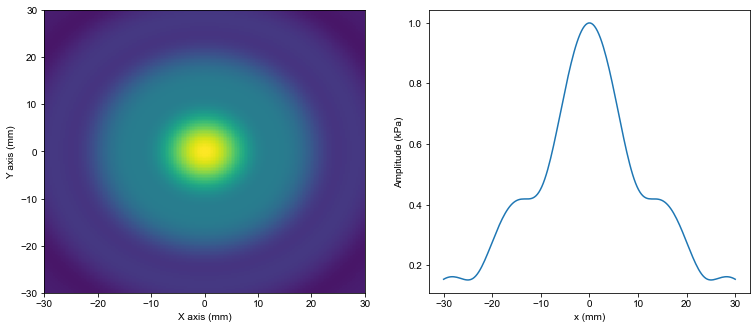

In [4]:
#%matplotlib notebook
def plotAmp(x, y, amps, window_len):
    fig, axes = plt.subplots(1, 2, figsize=(7, 5.2))
    fig.subplots_adjust(left=0.1, right=1.5)
    ax = axes[0]
    #axes.set_title('Acoustic pressure at the focal distance')
    ax.set_xlabel('X axis (mm)')
    ax.set_ylabel('Y axis (mm)')
    sm = ax.pcolormesh(y * 1e3, x * 1e3, amps, cmap='viridis', vmin=0, vmax=1) 
    #cbarax = fig.add_axes([0.85, 0.10, 0.05, 0.80])
    #fig.colorbar(sm, cax=cbarax)
    #cbarax.set_ylabel('Amplitude (kPa)')  
    ax = axes[1]
    #ax.set_title(f'Transverse pressure distribution at the focal distance')
    ax.set_xlabel('x (mm)')
    ax.set_ylabel('Amplitude (kPa)')
    ax.plot(x * 1e3,  amps[int(x.size / 2), :]) #label='prediction
    amp = amps[int(x.size / 2), :]
    #s=np.r_[amp[window_len-1:0:-1],amp,amp[-2:-window_len-1:-1]]
    #w=np.ones(window_len,'d')
    #filtered_amps=np.convolve(w/w.sum(),s,mode='valid')
    #ax.plot(x * 1e3,  filtered_amps * 1e-3, label='MA filtered prediction (2mm windows)')
    #ax.legend()
    return fig

n = 200
xmax = 0.03
x = np.linspace(-xmax, xmax, n)  # m
y = np.linspace(-xmax, xmax, n)  # m
window_len = int(2e-3 / (2 * xmax / n))

A = 1 #normalized
source = PlanarDiskTransducerSource((0, 0, 'focus'), Fdrive, u=1, r=r_tr)
fiber = myelinatedFiberReilly(SonicFiber, 10e-6)
u = source.computeSourceAmp(fiber, A)
source = PlanarDiskTransducerSource((0, 0, 'focus'), Fdrive, u=u, r=r_tr)
amps = source.DPSMxy (x, y, 0)  # Pa
fig = plotAmp(x, y, amps, window_len)
#fig.suptitle(f'trasducerR={r_tr*1e3}mm, Fdrive={si_format(Fdrive)}Hz, focus={(source.getFocalDistance() * 1e3):.2f}mm')
#fig.suptitle(f'trasducerR={r_tr*1e3}mm, Fdrive={si_format(Fdrive)}Hz', fontsize=12)
print(f'focus={(source.getFocalDistance() * 1e3):.2f}mm, -6dBwidth={(source.getFocalWidth(20e-3, 100) * 1e3):.2f}mm')

### Calibration data